In [1]:
# This script is written to plot ROC, AOC for multiclass SVM and Random forest

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from itertools import cycle

import time

In [2]:
# Read the data

df = pd.read_csv('morpho_data.csv')

# Replacing the target variable with number
#df = df.replace({"S_macrop" :0, "S_nepale" :1, "S_raraen" :2, "S_progra" :3, "S_richar" :4})



<AxesSubplot:>

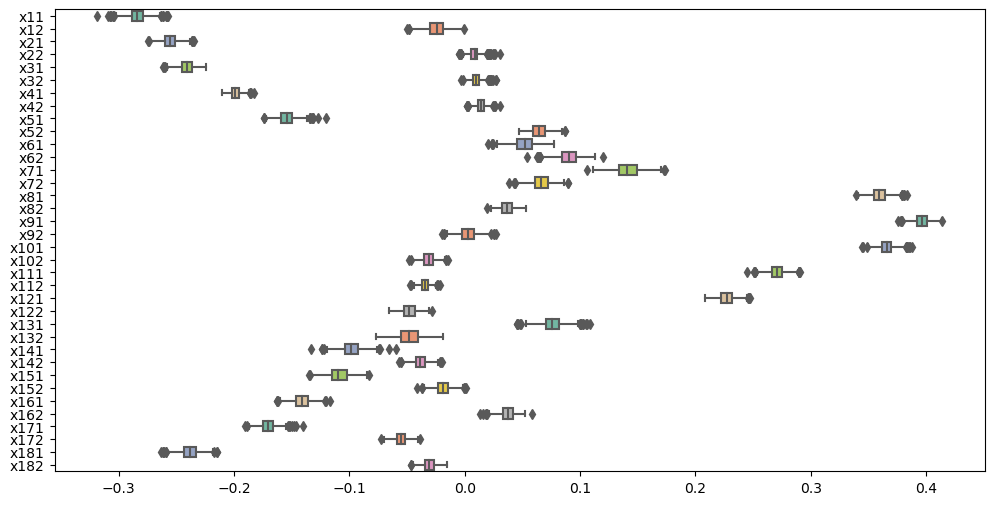

In [3]:
# checking the presence of outliner
plt.figure(figsize = (12,6))
sns.boxplot(data = df, orient = 'h', palette = 'Set2', dodge = False)

In [4]:
features = list(df.drop("target", axis=1))
X = df.drop("target", axis=1)
Y = df['target']

#sns.pairplot(X, hue = 'Y', diag_kind = 'kde') # This is not working


In [5]:
X.head()

,x11,x12,x21,x22,x31,x32,x41,x42,x51,x52,...,x141,x142,x151,x152,x161,x162,x171,x172,x181,x182
0,-0.288148,-0.009550,-0.256484,0.012423,-0.242492,0.011322,-0.195684,0.010561,-0.150642,0.060746,...,-0.092472,-0.048729,-0.101981,-0.028325,-0.134868,0.041167,-0.169369,-0.061869,-0.252201,-0.024854
1,-0.286231,-0.012331,-0.258212,0.021425,-0.242193,0.018584,-0.193497,0.017806,-0.142600,0.056921,...,-0.111671,-0.053449,-0.114907,-0.028010,-0.135183,0.033986,-0.176048,-0.058654,-0.252087,-0.018068
2,-0.282771,-0.010309,-0.255334,0.011606,-0.241299,0.011133,-0.198493,0.009692,-0.155895,0.064453,...,-0.092639,-0.049028,-0.096448,-0.026420,-0.137828,0.037849,-0.169344,-0.063300,-0.248899,-0.026901
3,-0.286849,-0.013814,-0.256010,0.009011,-0.240831,0.011569,-0.193446,0.015488,-0.156359,0.060355,...,-0.091281,-0.046142,-0.102665,-0.026040,-0.132465,0.039256,-0.170960,-0.059750,-0.249749,-0.024435
4,-0.281069,-0.025604,-0.254129,0.001498,-0.242382,0.003450,-0.192089,0.009818,-0.157360,0.068230,...,-0.097905,-0.035590,-0.102846,-0.019460,-0.136882,0.040859,-0.170126,-0.055772,-0.242002,-0.035514


In [6]:
Y.head()

0    S_macrop
1    S_macrop
2    S_macrop
3    S_macrop
4    S_macrop
Name: target, dtype: object

<AxesSubplot:ylabel='target'>

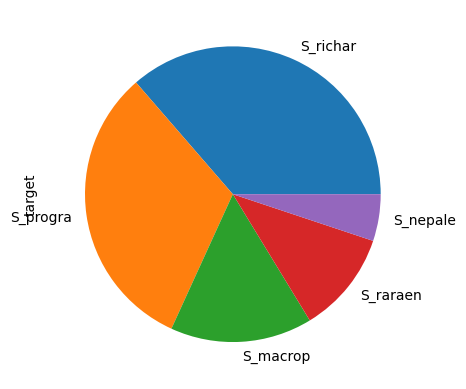

In [7]:
df['target'].value_counts().plot(kind = 'pie')

In [8]:
# Correlation matrix

X.corr()

,x11,x12,x21,x22,x31,x32,x41,x42,x51,x52,...,x141,x142,x151,x152,x161,x162,x171,x172,x181,x182
x11,1.000000,0.173632,0.657986,0.078979,0.570194,-0.005740,-0.238224,-0.138241,-0.375302,-0.420605,...,-0.723281,0.057505,-0.756377,-0.108658,-0.711997,-0.414864,-0.409935,0.586947,0.562138,0.359207
x12,0.173632,1.000000,0.477167,0.372787,0.434245,0.156889,0.178434,-0.270430,0.107042,-0.291446,...,-0.348721,-0.524682,-0.336616,-0.634180,-0.024154,-0.638784,-0.334011,0.376693,-0.234338,0.676894
x21,0.657986,0.477167,1.000000,0.248852,0.923522,0.164762,-0.131309,-0.017923,-0.124744,-0.692625,...,-0.730345,-0.040970,-0.778524,-0.198022,-0.499297,-0.508190,-0.674796,0.602201,0.275259,0.579121
x22,0.078979,0.372787,0.248852,1.000000,0.308962,0.915270,0.168149,0.522219,0.043441,-0.231972,...,-0.281151,-0.604076,-0.154172,-0.537472,0.021547,-0.445114,-0.287301,0.020796,0.094938,0.511749
x31,0.570194,0.434245,0.923522,0.308962,1.000000,0.259115,-0.097345,0.068085,-0.158250,-0.653282,...,-0.698785,-0.103471,-0.717985,-0.232782,-0.472548,-0.505262,-0.659624,0.603653,0.312440,0.578080
x32,-0.005740,0.156889,0.164762,0.915270,0.259115,1.000000,0.092817,0.719046,0.037481,-0.235836,...,-0.206550,-0.483218,-0.087049,-0.375707,0.047589,-0.290410,-0.259246,-0.068090,0.132616,0.388431
x41,-0.238224,0.178434,-0.131309,0.168149,-0.097345,0.092817,1.000000,-0.069444,0.169141,0.240768,...,0.097519,-0.345679,0.265234,-0.311555,0.522006,-0.080267,0.089022,-0.088964,-0.325862,0.190200
x42,-0.138241,-0.270430,-0.017923,0.522219,0.068085,0.719046,-0.069444,1.000000,0.109451,-0.243365,...,-0.042459,-0.098748,0.018422,0.079349,0.082246,0.128538,-0.182307,-0.305637,0.148078,0.042880
x51,-0.375302,0.107042,-0.124744,0.043441,-0.158250,0.037481,0.169141,0.109451,1.000000,0.063813,...,0.087503,-0.068392,0.112733,0.057607,0.469655,0.122377,-0.173101,-0.299983,-0.536856,0.107786
x52,-0.420605,-0.291446,-0.692625,-0.231972,-0.653282,-0.235836,0.240768,-0.243365,0.063813,1.000000,...,0.552023,-0.252818,0.644528,-0.195047,0.395481,0.266164,0.610877,-0.314571,-0.270798,-0.494737


<AxesSubplot:>

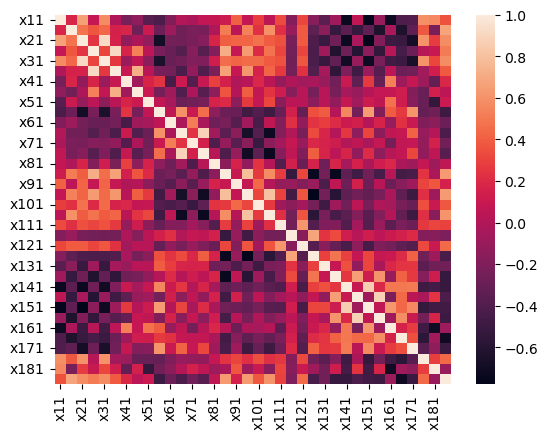

In [9]:
# correlation matrix with heat map

sns.heatmap(X.corr())



<AxesSubplot:>

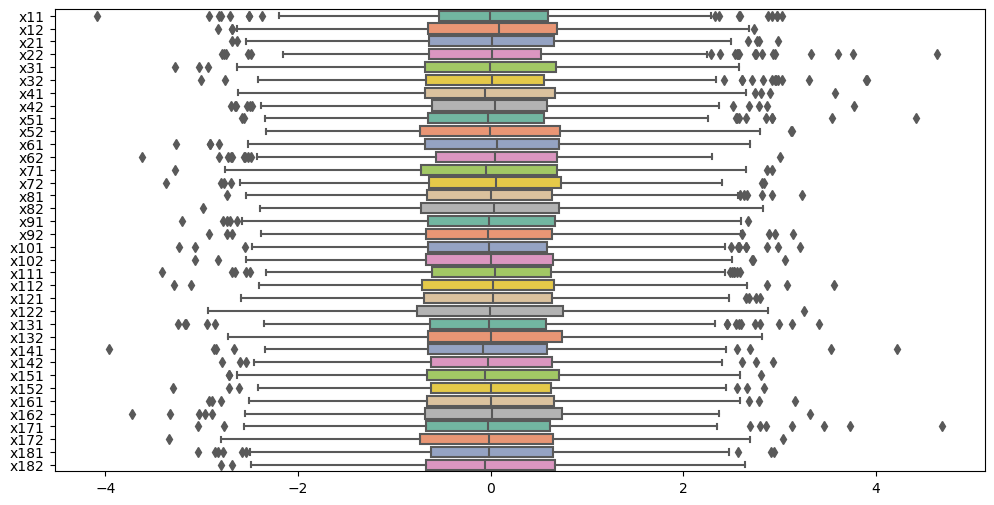

In [10]:
# Standarize the data in z scale

X_scaled_z = X.apply(zscore)
plt.figure(figsize = (12, 6))
sns.boxplot(data=X_scaled_z, orient="h", palette="Set2", dodge=False)



<AxesSubplot:>

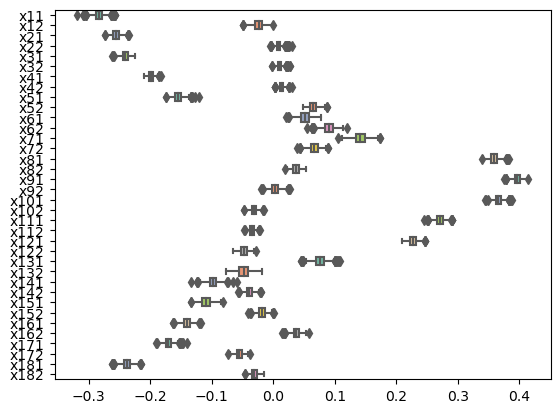

In [11]:
sns.boxplot(data=X, orient="h", palette="Set2", dodge=False)


In [12]:
# Principal component analysis (PCA)
covMatrix = np.cov(X_scaled_z, rowvar=False)

In [13]:
eig_vals, eig_vecs = np.linalg.eig(covMatrix)
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [14]:
pca = PCA(n_components=36)
pca.fit(X_scaled_z)
PCA(copy=True, iterated_power='auto', n_components=36, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=36)

In [15]:
# The eigen values:-
print(pca.explained_variance_)

[1.07538897e+01 5.24951717e+00 3.50072725e+00 3.13927225e+00
 2.30855029e+00 1.61135326e+00 1.28625825e+00 1.11170187e+00
 7.63445836e-01 6.60129123e-01 6.28090374e-01 5.63947947e-01
 5.04640616e-01 4.90284726e-01 4.22234119e-01 3.84167470e-01
 3.31654845e-01 3.19604463e-01 2.86788889e-01 2.60193466e-01
 2.14268302e-01 2.02608647e-01 1.75249707e-01 1.62186908e-01
 1.48924916e-01 1.39765305e-01 1.05185341e-01 1.01066035e-01
 8.51426171e-02 6.99622976e-02 4.84887915e-02 3.90103978e-02
 5.01518836e-14 8.80768803e-15 1.41634618e-15 1.22216402e-15]


In [16]:
# The eigen vectors
print(pca.components_)



[[ 1.62762463e-01  1.92522925e-01  2.45456662e-01 ...  1.70402749e-01
   7.01578902e-02  2.46097680e-01]
 [ 2.87501089e-01 -1.11634481e-01  1.75956060e-01 ...  1.83029132e-01
   2.80242410e-01 -8.24681244e-02]
 [-1.39801548e-01 -1.82431634e-01 -4.82702413e-02 ... -1.58795965e-01
   1.84397014e-05 -8.98886867e-02]
 ...
 [-2.50902580e-02  4.60661888e-01 -3.65958488e-03 ...  2.33842745e-01
  -2.61687385e-02  2.76854797e-01]
 [ 2.04771016e-01  4.18171376e-02  1.42401687e-01 ...  4.48121046e-02
   1.46748595e-01  3.09431636e-02]
 [ 3.70150001e-01  2.50890799e-02  2.91499983e-01 ...  2.22041613e-02
   3.27997282e-01  1.72374539e-02]]


[2.98153403e-01 1.45543747e-01 9.70582524e-02 8.70368516e-02
 6.40049454e-02 4.46750405e-02 3.56617264e-02 3.08221215e-02
 2.11666643e-02 1.83021911e-02 1.74139114e-02 1.56355518e-02
 1.39912460e-02 1.35932266e-02 1.17065120e-02 1.06511078e-02
 9.19518640e-03 8.86108753e-03 7.95127022e-03 7.21390764e-03
 5.94062474e-03 5.61735884e-03 4.85882762e-03 4.49665932e-03
 4.12896836e-03 3.87501661e-03 2.91628130e-03 2.80207283e-03
 2.36059339e-03 1.93971648e-03 1.34435991e-03 1.08156985e-03
 1.39046942e-15 2.44194633e-16 3.92684364e-17 3.38847033e-17]


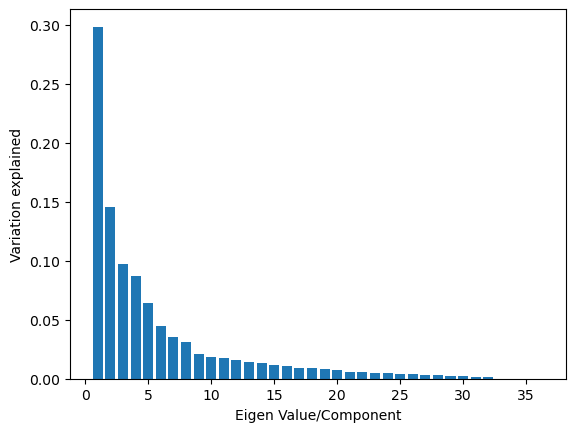

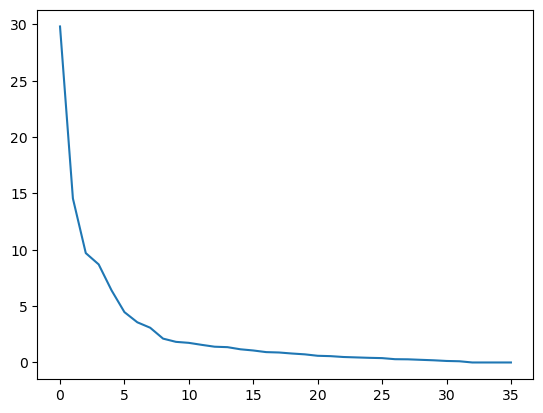

In [17]:
#The percentage of variation explained by each eigen Vector
print(pca.explained_variance_ratio_)
plt.bar(list(range(1,37)),pca.explained_variance_ratio_,alpha=1, align='center')
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value/Component')
plt.show()
plt.plot(var_exp)




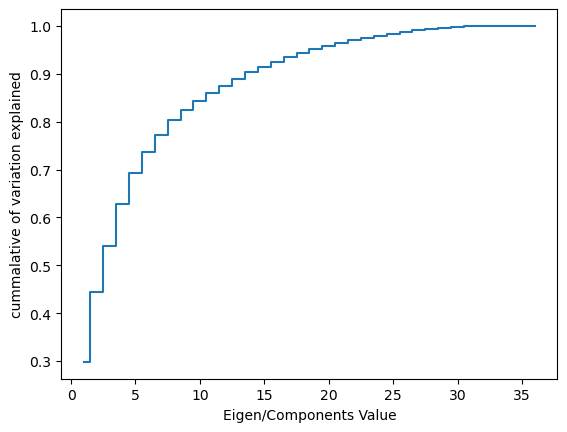

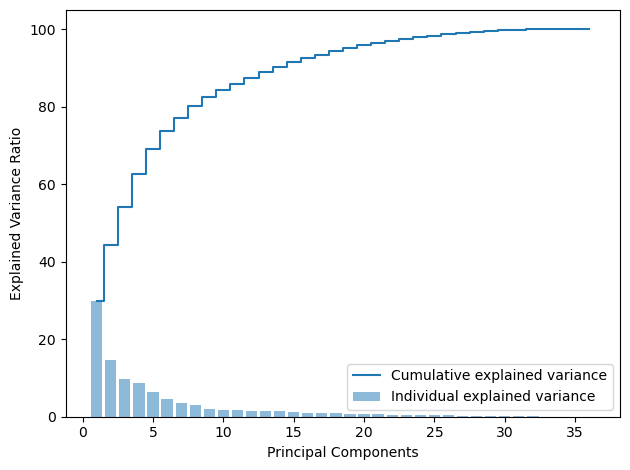

In [18]:
plt.step(list(range(1,37)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('cummalative of variation explained')
plt.xlabel('Eigen/Components Value')
plt.show()

# Ploting 
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [19]:
#Raw data spliting
X_train,X_test,y_train,y_test = train_test_split(X_scaled_z, Y, test_size=0.30, random_state=7)


svm_model = SVC(gamma="scale")
params = {'kernel': ['linear', 'rbf'], 'C':[0.01, 0.1, 0.5, 1]}
gridSearch_model = GridSearchCV(svm_model, param_grid=params, cv=5)
gridSearch_model.fit(X_scaled_z, Y)
print("Best Hyper Surface Parameters found by GridSearch:\n", gridSearch_model.best_params_)
# Best Hyper Surface Parameters found by GridSearch:
# {'C': 1, 'kernel': 'rbf'}

Best Hyper Surface Parameters found by GridSearch:
 {'C': 1, 'kernel': 'rbf'}


In [20]:
# Fit support vector machine
svm = SVC(C=1, kernel = 'rbf', gamma = "auto")

svm.fit(X_train, y_train)
y_predicted = svm.predict(X_test)
score = svm.score(X_test, y_test)
accuracy = accuracy_score(y_test, y_predicted)
print ("accuracy score:{}".format(accuracy))

# confusion matrix
svm_confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
print ("confusion matrix:{}".format(svm_confusion_matrix))


accuracy score:0.8930817610062893
confusion matrix:[[24  1  2  1  0]
 [ 1  3  1  0  2]
 [ 0  0 38  1  2]
 [ 2  1  0 14  0]
 [ 0  0  2  1 63]]


In [21]:
# Without PCA logistic regression
log_reg = LogisticRegression(solver = 'lbfgs', multi_class = 'auto')
log_reg.fit(X_train, y_train)

# Predicting for test set
y_predicted = log_reg.predict(X_test)
log_reg_score = log_reg.score(X_test, y_predicted)
accuracy = accuracy_score(y_test, y_predicted)
print ("accuracy score:{}".format(accuracy))

# confusion matrix
log_reg_confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

log_reg_confusion_matrix

accuracy score:0.8867924528301887


array([[25,  0,  0,  2,  1],
       [ 0,  4,  1,  0,  2],
       [ 0,  0, 36,  2,  3],
       [ 3,  0,  0, 14,  0],
       [ 0,  2,  1,  1, 62]], dtype=int64)

In [22]:
# Fitting naive bayes with raw data set
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_predicted = naive_bayes.predict(X_test)
naive_bayes_score = naive_bayes.score(X_test, y_test)
accuracy = accuracy_score(y_test, y_predicted)
print ("accuracy score:{}".format(accuracy))

# confusion matrix
naive_bayes_confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
naive_bayes_confusion_matrix

accuracy score:0.7421383647798742


array([[18,  2,  6,  1,  1],
       [ 0,  4,  1,  0,  2],
       [ 1,  2, 30,  5,  3],
       [ 2,  0,  1, 14,  0],
       [ 0,  0,  7,  7, 52]], dtype=int64)

In [23]:





#comarasion using confusion matrix:
#fig, axs = plt.subplots(nrows = )
    
    
############# DO later


SyntaxError: invalid syntax (1068489436.py, line 2)

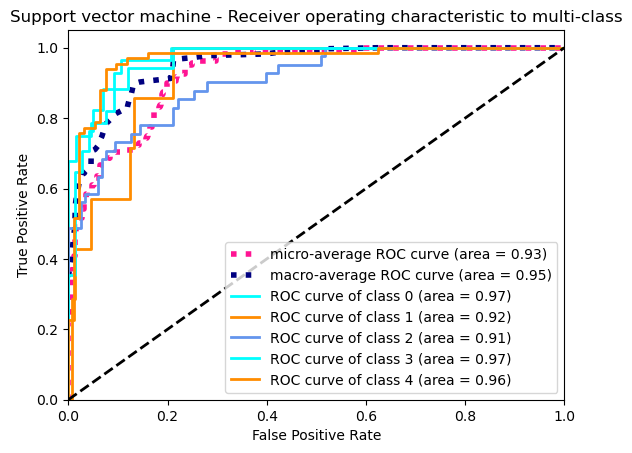

In [24]:
# ROC curve
y_classes = label_binarize(df['target'], classes=['S_macrop', 'S_nepale', 'S_progra', 'S_raraen', 'S_richar'])
n_classes = y_classes.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y_classes, test_size=0.30, random_state=7)
classifier = OneVsRestClassifier(SVC(gamma="scale", kernel='rbf', probability=True,random_state=7))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
lw = 2 #linewidth

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
    
# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))    
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support vector machine - Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
    
    
    
    

In [ ]:
set(df['target'])


In [ ]:
# Random forest
classifier = OneVsRestClassifier(SVC(gamma="scale", kernel='rbf', probability=True,random_state=7))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
lw = 2 #linewidth
